# **🍽️ Analisis Distribusi Restoran Cepat Saji dan Hubungannya dengan Kawasan Pendidikan**

# Pre Processing Data

In [ ]:
# Mengecek CRS
print(batas_wilayah.crs)

# Reprojecting data ke EPSG 4326 (WGS 84)
batas_wilayah = batas_wilayah.to_crs(epsg=3857)

# Menghapus baris dengan data kosong
batas_wilayah = batas_wilayah.dropna()
batas_wilayah.head()

EPSG:4326


,DESA,KECAMATAN,KABUPATEN,PROPINSI,LUAS,MI_PRINX,geometry
0,Kuningan Barat,Mampang Prapatan,Jakarta Selatan,DKI Jakarta,1.4136,1,"POLYGON ((11891405.266 -696404.177, 11891594.3..."
1,Kalibata,Pancoran,Jakarta Selatan,DKI Jakarta,1.1175,1,"POLYGON ((11892764.366 -699235.418, 11892682.5..."
2,Rawajati,Pancoran,Jakarta Selatan,DKI Jakarta,0.4135,1,"POLYGON ((11894742.068 -698631.015, 11894737.7..."
3,Duren Tiga,Pancoran,Jakarta Selatan,DKI Jakarta,2.4185,1,"POLYGON ((11892488.627 -698548.928, 11892481.7..."
4,Pengadengan,Pancoran,Jakarta Selatan,DKI Jakarta,0.7709,1,"POLYGON ((11894817.542 -697841.058, 11894835.2..."


# Core Analysis

## Membaca Data Fasilitas

In [ ]:
# Membaca data fasilitas olahraga dan rekreasi
poi = gpd.read_file('/content/drive/MyDrive/Geografi_Komputasi/Tugas_4/01_OSMData/gis_osm_pois_free_1.shp')
poi.head()
poi

,osm_id,code,fclass,name,geometry
0,29391283,2501,supermarket,Setrasai Mall,POINT (107.58299 -6.8807)
1,29391348,2401,hotel,Hotel Sukajadi,POINT (107.59709 -6.88621)
2,29392045,2005,post_office,None,POINT (107.6019 -6.88721)
3,29392082,2099,public_building,Puri Cipaganti,POINT (107.60149 -6.88526)
4,29392374,2401,hotel,Imperium,POINT (107.60061 -6.90514)
...,...,...,...,...,...
70471,7099701893,2721,attraction,Toko Merah,POINT (106.81133 -6.13589)
70472,7099742248,2301,restaurant,Berastagi Mountain View Homestay & Pizzeria,POINT (98.51467 3.17397)
70473,7099827628,2404,guesthouse,Berastagi Mountain View Homestay & Pizzeria,POINT (98.51471 3.17391)
70474,7099851569,2110,hospital,Puskesmas Rawat Inap Tanah Kampung,POINT (101.43243 -2.07647)


Meninjau data fast food

In [ ]:
# Membuat variabel fast food
ffood = poi[poi['fclass'] == 'fast_food']
ffood = ffood.to_crs(epsg=3857)
ffood.head()

,osm_id,code,fclass,name,geometry
257,430783319,2302,fast_food,McDonald's,POINT (12825968.948 -968777.647)
259,436251315,2302,fast_food,KFC,POINT (12830593.95 -969325.243)
282,456643875,2302,fast_food,KFC 21,POINT (13293369.323 -574204.805)
292,462084840,2302,fast_food,Van Hollano,POINT (11293121.524 59098.616)
303,469220961,2302,fast_food,KFC Carrefour Sunset Road,POINT (12822537.158 -973689.134)


In [ ]:
# Spatial join fast food dalam Jakarta
batas_wilayah = batas_wilayah.rename(columns={'index_right': 'index_right_bw'})
ffood = sjoin(ffood, batas_wilayah, how='inner', predicate='intersects')
ffood.head()

,osm_id,code,fclass,name,geometry,index_right,DESA,KECAMATAN,KABUPATEN,PROPINSI,LUAS,MI_PRINX
506,610695274,2302,fast_food,Burger King,POINT (11891537.558 -690027.432),209,Kebon Kacang,Tanah Abang,Jakarta Pusat,DKI Jakarta,0.7243,1
1500,989068499,2302,fast_food,McDonald's kemang,POINT (11890524.35 -697989.126),9,Pulo,Kebayoran Baru,Jakarta Selatan,DKI Jakarta,0.8720,1
2167,1343106662,2302,fast_food,KFC,POINT (11893428.809 -691141.347),213,Menteng,Menteng,Jakarta Pusat,DKI Jakarta,1.9820,1
2168,1343132773,2302,fast_food,McDonald's,POINT (11893481.107 -691258.897),213,Menteng,Menteng,Jakarta Pusat,DKI Jakarta,1.9820,1
2194,1345742942,2302,fast_food,KFC,POINT (11889094.886 -694501.896),39,Grogol Selatan,Kebayoran Lama,Jakarta Selatan,DKI Jakarta,6.2839,1


In [ ]:
# Menghitung jumlah fast food per kecamatan
ffood_kecamatan = ffood.groupby('KECAMATAN').size().reset_index(name='jumlah_ffood')

# Membersihkan data kosong
ffood_kecamatan['jumlah_ffood'] = ffood_kecamatan['jumlah_ffood'].fillna(0)

print(ffood_kecamatan)

            KECAMATAN  jumlah_ffood
0              Cakung             2
1          Cengkareng             8
2            Cilandak             8
3            Cipayung             2
4         Duren Sawit             9
5              Gambir             9
6   Grogol Petamburan            22
7          Jaga Karsa             6
8          Jatinegara             1
9      Kebayoran Baru            15
10     Kebayoran Lama            13
11        Kebon Jeruk             6
12      Kelapa Gading             2
13          Kembangan             6
14        Kramat Jati             1
15   Mampang Prapatan             2
16            Menteng            18
17           Palmerah             6
18           Pancoran             2
19       Pasar Minggu             2
20         Pasar Rebo             1
21        Penjaringan             1
22       Pesanggrahan             2
23        Pulo Gadung             4
24        Sawah Besar             2
25         Setia Budi            23
26          Tamansari       

In [ ]:
# Membuat variabel kawasan pendidikan (sekolah dan taman kanak-kanak)
school_cat = ['school', 'kindergarten']
school = poi[poi['fclass'].isin(school_cat)]
school = school.to_crs(epsg=3857)
school.head()

,osm_id,code,fclass,name,geometry
10,31288438,2082,school,SMPN 5,POINT (11979594.236 -771620.91)
14,31288870,2082,school,Tri Mulya,POINT (11976863.525 -769575.201)
29,32042245,2082,school,SMPN 2,POINT (11979557.044 -771537.145)
30,32042288,2082,school,SMUN 3,POINT (11979644.408 -771374.83)
31,32042320,2082,school,SMUN 5,POINT (11979714.918 -771353.569)


In [ ]:
# Spatial join school dalam Jakarta untuk mendapatkan kolom 'KECAMATAN'
school = sjoin(school, batas_wilayah, how='inner', predicate='intersects')

school.head()

,osm_id,code,fclass,name,geometry,index_right,DESA,KECAMATAN,KABUPATEN,PROPINSI,LUAS,MI_PRINX
2756,1395465566,2083,kindergarten,Highscope Taman Rasuna,POINT (11893027.725 -693693.193),19,Karet Kuningan,Setia Budi,Jakarta Selatan,DKI Jakarta,1.8855,1
4421,1682958727,2082,school,"TK, SD, SMP GKPI Rawamangun",POINT (11899153.125 -691504.4),192,Rawamangun,Pulo Gadung,Jakarta Timur,DKI Jakarta,2.9031,1
4501,1694304047,2083,kindergarten,TK Insan Utama,POINT (11863520.813 -630344.936),212,Pulau Kelapa,Pulau Seribu,Jakarta Utara,DKI Jakarta,5.6757,1
4624,1707153371,2083,kindergarten,PAUD Melati,POINT (11868187.571 -640578.021),211,Pulau Panggang,Pulau Seribu,Jakarta Utara,DKI Jakarta,1.3184,1
18161,3180186217,2082,school,Yayasan Darul Marfu',POINT (11887760.232 -698140.689),36,Kebayoran Lama Selatan,Kebayoran Lama,Jakarta Selatan,DKI Jakarta,1.9228,1


In [ ]:
# Menghitung jumlah sekolah per kecamatan
school_kecamatan = school.groupby('KECAMATAN').size().reset_index(name='jumlah_school')

# Membersihkan data kosong
school_kecamatan['jumlah_school'] = school_kecamatan['jumlah_school'].fillna(0)

print(school_kecamatan)

            KECAMATAN  jumlah_school
0              Cakung              2
1       Cempaka Putih              2
2          Cengkareng             43
3            Cilandak              6
4           Cilincing              6
5             Ciracas              5
6         Duren Sawit             19
7              Gambir             12
8   Grogol Petamburan             16
9          Jaga Karsa              8
10         Jatinegara             23
11         Johar Baru              4
12          Kalideres             22
13     Kebayoran Baru              8
14     Kebayoran Lama             25
15        Kebon Jeruk             10
16      Kelapa Gading              3
17          Kemayoran             23
18          Kembangan              6
19               Koja              8
20        Kramat Jati              1
21            Makasar              4
22   Mampang Prapatan              3
23           Matraman             15
24            Menteng             13
25         Pademangan              7
2

## Kernel Density Estimation

## Buffer Sekolah terhadap Fast Food

In [ ]:
# Buat buffer 400m dan 800m di sekitar sekolah
school['buffer_400m'] = school.geometry.buffer(400)
school['buffer_800m'] = school.geometry.buffer(800)

<ipython-input-14-7fa9142a8522>:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(markerscale=1.5, loc="upper right", fontsize=10)


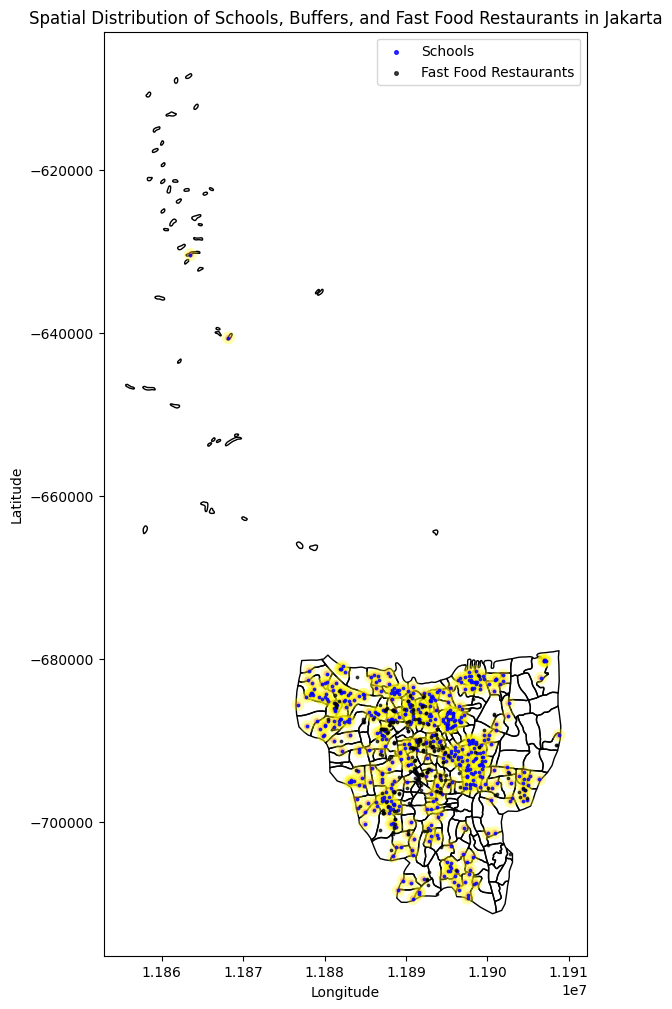

In [ ]:
# Visualisasi
fig, ax = plt.subplots(figsize=(14, 12))

# Plot batas wilayah Jakarta
batas_wilayah.plot(ax=ax, color='none', edgecolor='black', linewidth=1, label="Jakarta Administrative Boundary")

# Plot buffer 400m
school['buffer_400m'].plot(ax=ax, color='red', alpha=0.3, edgecolor='none', label="Buffer 400m")

# Plot buffer 800m
school['buffer_800m'].plot(ax=ax, color='yellow', alpha=0.3, edgecolor='none', label="Buffer 800m")

# Plot titik sekolah
ax.scatter(school.geometry.x, school.geometry.y, color='blue', s=3, alpha=0.8, label="Schools")

# Plot restoran cepat saji sebagai titik hitam
ax.scatter(ffood.geometry.x, ffood.geometry.y, color='black', s=3, label="Fast Food Restaurants", alpha=0.7)

# Tambahkan label dan judul
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Spatial Distribution of Schools, Buffers, and Fast Food Restaurants in Jakarta")

# Tambahkan legenda
ax.legend(markerscale=1.5, loc="upper right", fontsize=10)

# Tampilkan plot
plt.show()

## Klasifikasi sekolah berdasarkan jumlah restoran dalam buffer

In [ ]:
# Hitung jumlah restoran dalam setiap buffer
school['count_400m'] = school['buffer_400m'].apply(lambda buf: ffood.within(buf).sum())
school['count_800m'] = school['buffer_800m'].apply(lambda buf: ffood.within(buf).sum())

In [ ]:
# Klasifikasi sekolah berdasarkan jumlah restoran dalam buffer
def classify_school(row):
    if row['count_800m'] == 0:
        return "No restaurants within 800m"
    elif row['count_400m'] > 0:
        return "At least 1 restaurant within 400m"
    else:
        return "At least 1 restaurant within 800m"

school['category'] = school.apply(classify_school, axis=1)

In [ ]:
# Warna untuk setiap kategori sekolah
colors = {
    "No restaurants within 800m": "gray",
    "At least 1 restaurant within 800m": "orange",
    "At least 1 restaurant within 400m": "red"
}

In [ ]:
# Export
import os
output_dir = '/content/drive/MyDrive/Geografi_Komputasi/Tugas_4/Output2'
# Drop the buffer columns before saving to file
school[['osm_id', 'code', 'fclass', 'name', 'geometry', 'category']].to_file(os.path.join(output_dir, 'kategori_sekolah.shp'))

In [ ]:
# Export
import os
output_dir = '/content/drive/MyDrive/Geografi_Komputasi/Tugas_4/Output2'
# Drop the buffer columns before saving to file
ffood.to_file(os.path.join(output_dir, 'fast_food.shp'))

<ipython-input-19-f08db4cd6496>:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  ffood.to_file(os.path.join(output_dir, 'fast_food.shp'))
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(


<ipython-input-20-4b848c33d872>:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(markerscale=1.5, loc="upper right", fontsize=10)


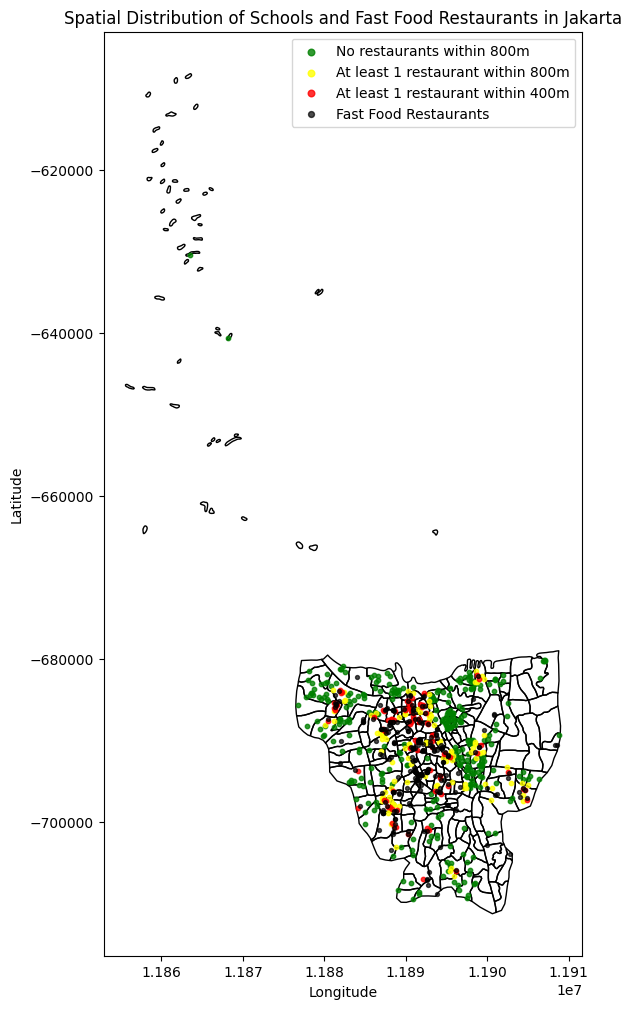

In [ ]:
# Visualisasi
plt.figure(figsize=(14, 12))

# Plot batas wilayah Jakarta
batas_wilayah.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=1, label="Jakarta Administrative Boundary")

# Warna berdasarkan kategori sekolah
category_colors = {
    "No restaurants within 800m": "green",
    "At least 1 restaurant within 800m": "yellow",
    "At least 1 restaurant within 400m": "red"
}

# Plot sekolah berdasarkan kategorinya
for category, color in category_colors.items():
    subset = school[school['category'] == category]
    plt.scatter(subset.geometry.x, subset.geometry.y,
                color=color, label=category, s=10, alpha=0.8)

# Plot restoran cepat saji sebagai titik hitam
plt.scatter(ffood.geometry.x, ffood.geometry.y, color='black', s=8, label="Fast Food Restaurants", alpha=0.7)

# Tambahkan label dan judul
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Schools and Fast Food Restaurants in Jakarta")

# Tambahkan legenda
plt.legend(markerscale=1.5, loc="upper right", fontsize=10)

# Tampilkan plot
plt.show()

## KDE Sekolah berdasarkan klasifikasi

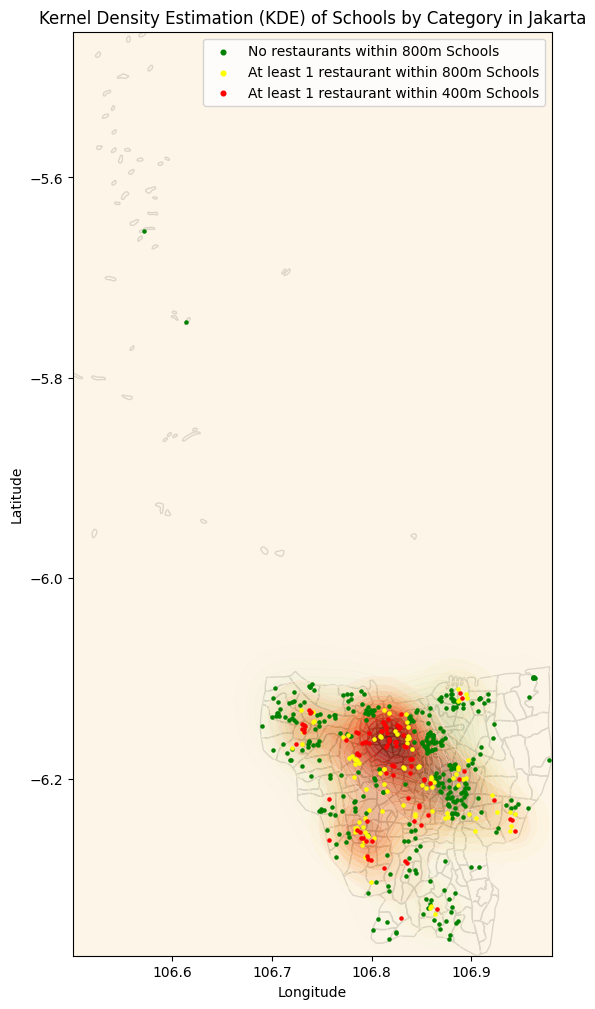

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import geopandas as gpd

# Pastikan data dalam sistem koordinat yang benar (WGS84 untuk plotting)
school = school.to_crs(epsg=4326)
batas_wilayah = batas_wilayah.to_crs(epsg=4326)

# Pisahkan sekolah berdasarkan kategori
categories = school['category'].unique()
school_categories = {category: school[school['category'] == category] for category in categories}

# Buat grid untuk estimasi KDE
xx, yy = np.meshgrid(
    np.linspace(batas_wilayah.total_bounds[0], batas_wilayah.total_bounds[2], 200),
    np.linspace(batas_wilayah.total_bounds[1], batas_wilayah.total_bounds[3], 200)
)

# Warna kategori sekolah dan colormap yang sesuai
category_colors = {
    "No restaurants within 800m": "Greens",
    "At least 1 restaurant within 800m": "YlOrBr",
    "At least 1 restaurant within 400m": "Reds"
}

# Visualisasi KDE untuk setiap kategori
fig, ax = plt.subplots(figsize=(14, 12))

# Plot batas wilayah Jakarta
batas_wilayah.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

for category, cmap_name in category_colors.items():
    subset = school_categories.get(category, None)
    if subset is not None and len(subset) > 1:
        # Hitung KDE
        x_vals = np.array(subset.geometry.x)
        y_vals = np.array(subset.geometry.y)
        kde = gaussian_kde(np.vstack([x_vals, y_vals]))

        # Estimasi kepadatan KDE
        density = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

        # Plot KDE dengan transparansi menggunakan cmap_name
        ax.contourf(xx, yy, density, cmap=cmap_name, alpha=0.5, levels=15)

# Plot titik sekolah
for category, color in zip(category_colors.keys(), ['green', 'yellow', 'red']):
    subset = school_categories.get(category, None)
    if subset is not None:
        ax.scatter(subset.geometry.x, subset.geometry.y, color=color, s=5, label=f"{category} Schools")

# Tambahkan label dan judul
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Kernel Density Estimation (KDE) of Schools by Category in Jakarta")

# Tambahkan legenda
ax.legend(markerscale=1.5, loc="upper right", fontsize=10)

# Tampilkan plot
plt.show()

# Visualisasi Akhir

<ipython-input-26-0dfb80a138c0>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  batas_kep_seribu = batas_wilayah[batas_wilayah.geometry.centroid.y > -6.1]
<ipython-input-26-0dfb80a138c0>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  batas_jakarta = batas_wilayah[batas_wilayah.geometry.centroid.y <= -6.1]


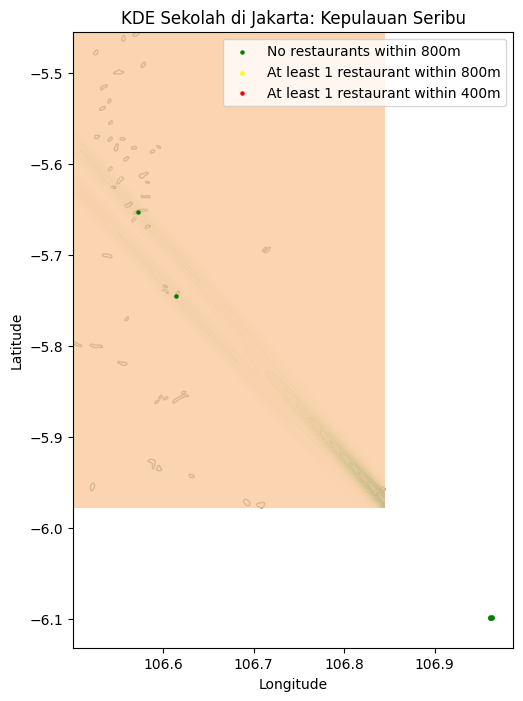

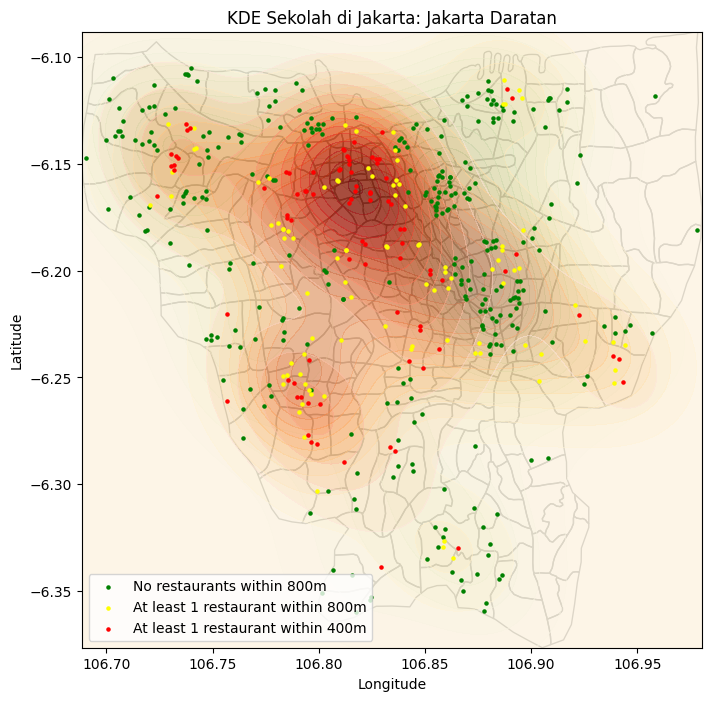

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import geopandas as gpd

# Pastikan data dalam sistem koordinat yang benar (WGS84 untuk plotting)
school = school.to_crs(epsg=4326)
batas_wilayah = batas_wilayah.to_crs(epsg=4326)

# Pisahkan wilayah Kepulauan Seribu dan Jakarta Daratan berdasarkan latitude > -6.1
kepulauan_seribu = school[school.geometry.y > -6.1]
jakarta_daratan = school[school.geometry.y <= -6.1]

batas_kep_seribu = batas_wilayah[batas_wilayah.geometry.centroid.y > -6.1]
batas_jakarta = batas_wilayah[batas_wilayah.geometry.centroid.y <= -6.1]

# Pisahkan kategori sekolah berdasarkan wilayah
def split_categories(school_subset):
    return {
        "No restaurants within 800m": school_subset[school_subset['category'] == "No restaurants within 800m"],
        "At least 1 restaurant within 800m": school_subset[school_subset['category'] == "At least 1 restaurant within 800m"],
        "At least 1 restaurant within 400m": school_subset[school_subset['category'] == "At least 1 restaurant within 400m"]
    }

categories_kep_seribu = split_categories(kepulauan_seribu)
categories_jakarta = split_categories(jakarta_daratan)

# Fungsi untuk menghitung KDE
def compute_kde(school_subset):
    if len(school_subset) > 1:
        x_vals = np.array(school_subset.geometry.x)
        y_vals = np.array(school_subset.geometry.y)
        return gaussian_kde(np.vstack([x_vals, y_vals]))
    else:
        return None  # Jika tidak ada cukup data, KDE tidak dihitung

# Hitung KDE untuk setiap kategori di masing-masing wilayah
kde_kep_seribu = {category: compute_kde(subset) for category, subset in categories_kep_seribu.items()}
kde_jakarta = {category: compute_kde(subset) for category, subset in categories_jakarta.items()}

# Buat grid untuk estimasi KDE
def generate_grid(bounds, size=200):
    return np.meshgrid(
        np.linspace(bounds[0], bounds[2], size),
        np.linspace(bounds[1], bounds[3], size)
    )

xx_kep_seribu, yy_kep_seribu = generate_grid(batas_kep_seribu.total_bounds)
xx_jakarta, yy_jakarta = generate_grid(batas_jakarta.total_bounds)

# Hitung kepadatan KDE
def compute_density(kde, xx, yy):
    if kde is not None:
        return kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
    else:
        return np.zeros_like(xx)

density_kep_seribu = {category: compute_density(kde, xx_kep_seribu, yy_kep_seribu) for category, kde in kde_kep_seribu.items()}
density_jakarta = {category: compute_density(kde, xx_jakarta, yy_jakarta) for category, kde in kde_jakarta.items()}

# Warna kategori sekolah
category_colors = {
    "No restaurants within 800m": "Greens",
    "At least 1 restaurant within 800m": "YlOrBr",
    "At least 1 restaurant within 400m": "Reds"
}

# **Visualisasi KDE untuk Kepulauan Seribu**
fig, ax = plt.subplots(figsize=(10, 8))
batas_kep_seribu.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

for category, cmap in category_colors.items():
    ax.contourf(xx_kep_seribu, yy_kep_seribu, density_kep_seribu[category], cmap=cmap, alpha=0.5, levels=15)

# Tambahkan titik sekolah
for category, color in zip(category_colors.keys(), ['green', 'yellow', 'red']):
    subset = categories_kep_seribu[category]
    ax.scatter(subset.geometry.x, subset.geometry.y, s=5, color=color, label=category)

ax.set_title("KDE Sekolah di Jakarta: Kepulauan Seribu")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()

# **Visualisasi KDE untuk Jakarta Daratan**
fig, ax = plt.subplots(figsize=(10, 8))
batas_jakarta.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

for category, cmap in category_colors.items():
    ax.contourf(xx_jakarta, yy_jakarta, density_jakarta[category], cmap=cmap, alpha=0.5, levels=15)

# Tambahkan titik sekolah
for category, color in zip(category_colors.keys(), ['green', 'yellow', 'red']):
    subset = categories_jakarta[category]
    ax.scatter(subset.geometry.x, subset.geometry.y, s=5, color=color, label=category)

ax.set_title("KDE Sekolah di Jakarta: Jakarta Daratan")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()


## Data penjelas

In [ ]:
# Hitung jumlah sekolah per kategori di setiap kecamatan
kecamatan_category_counts = pd.crosstab(school['KECAMATAN'], school['category'])

# Hitung persentase di setiap kecamatan
kecamatan_category_percentages = kecamatan_category_counts.div(kecamatan_category_counts.sum(axis=1), axis=0) * 100

# Gabungkan jumlah dan persentase dalam satu tabel
kecamatan_summary = kecamatan_category_counts.astype(str) + " (" + kecamatan_category_percentages.round(2).astype(str) + "%)"

# Tampilkan hasil
print(kecamatan_summary)

category          At least 1 restaurant within 400m  \
KECAMATAN                                             
Cakung                                     0 (0.0%)   
Cempaka Putih                              0 (0.0%)   
Cengkareng                              10 (23.26%)   
Cilandak                                 2 (33.33%)   
Cilincing                                  0 (0.0%)   
Ciracas                                    0 (0.0%)   
Duren Sawit                              4 (21.05%)   
Gambir                                  10 (83.33%)   
Grogol Petamburan                        10 (62.5%)   
Jaga Karsa                                1 (12.5%)   
Jatinegara                                 0 (0.0%)   
Johar Baru                                 0 (0.0%)   
Kalideres                                  0 (0.0%)   
Kebayoran Baru                            3 (37.5%)   
Kebayoran Lama                            6 (24.0%)   
Kebon Jeruk                               1 (10.0%)   
Kelapa Gad

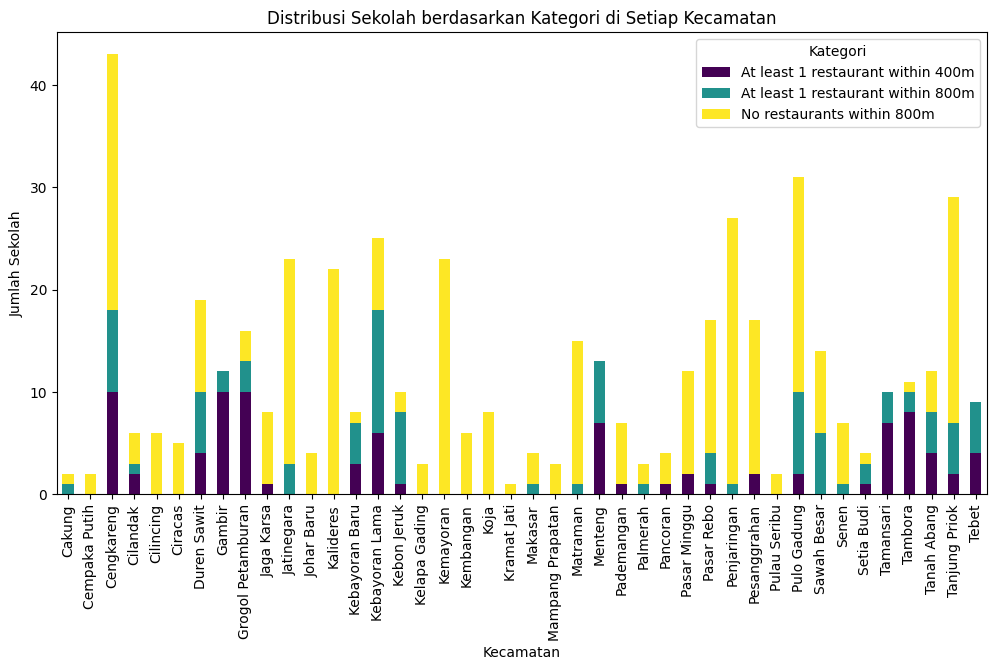

In [ ]:
# Visualisasi stacking bar

kecamatan_category_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title("Distribusi Sekolah berdasarkan Kategori di Setiap Kecamatan")
plt.xlabel("Kecamatan")
plt.ylabel("Jumlah Sekolah")
plt.xticks(rotation=90)
plt.legend(title="Kategori")
plt.show()

In [ ]:
from scipy.spatial import cKDTree
import numpy as np

# Konversi ke sistem koordinat UTM (meter) agar jarak valid
school = school.to_crs(epsg=32748)  # UTM untuk Jakarta
ffood = ffood.to_crs(epsg=32748)
batas_wilayah = batas_wilayah.to_crs(epsg=32748)

# Konversi geometri ke array numpy (longitude, latitude dalam meter)
school_coords = np.array(list(zip(school.geometry.x, school.geometry.y)))
ffood_coords = np.array(list(zip(ffood.geometry.x, ffood.geometry.y)))

# Buat KDTree untuk pencarian tetangga terdekat
ffood_tree = cKDTree(ffood_coords)

# Hitung jarak ke restoran cepat saji terdekat (dalam meter)
distances, _ = ffood_tree.query(school_coords)
distances_km = distances / 1000  # Konversi ke kilometer

# Hitung median jarak ke restoran cepat saji terdekat
median_distance = np.median(distances_km)

# Hitung jumlah sekolah yang termasuk dalam kategori 'At least 1 restaurant within 800m'
schools_within_800m = (school['category'] == 'At least 1 restaurant within 800m').sum()
percentage_within_800m = (schools_within_800m / len(school)) * 100

# Hitung jumlah sekolah yang termasuk dalam kategori 'At least 1 restaurant within 400m'
schools_within_400m = (school['category'] == 'At least 1 restaurant within 400m').sum()
percentage_within_400m = (schools_within_400m / len(school)) * 100


# Hitung jumlah sekolah yang termasuk dalam kategori 'No restaurants within 800m'
schools_without_800m = (school['category'] == 'No restaurants within 800m').sum()
percentage_without_800m = (schools_without_800m / len(school)) * 100

# Bandingkan kepadatan restoran dalam radius 1.5 km dengan distribusi acak
radius_1_5km = 1.5  # km
area_1_5km = np.pi * (radius_1_5km ** 2)  # Luas lingkaran dengan radius 1.5 km dalam km²

# Hitung jumlah restoran dalam radius 1.5 km dari setiap sekolah
restaurants_in_1_5km = np.array([len(ffood_tree.query_ball_point(pt, radius_1_5km * 1000)) for pt in school_coords])

# Bandingkan dengan distribusi acak di area studi (pastikan luas dalam km²)
random_density = len(ffood) / (batas_wilayah.geometry.area.sum() / 1e6)  # Restoran per km²
expected_restaurants_in_1_5km = random_density * area_1_5km
ratio_to_random = restaurants_in_1_5km.mean() / expected_restaurants_in_1_5km

# **Cetak Hasil**
print(f"Jarak median dari sekolah ke restoran cepat saji terdekat adalah {median_distance:.2f} km (sekitar {round(median_distance * 12)} menit berjalan kaki).")
print(f"{schools_within_800m} sekolah ({percentage_within_800m:.0f}%) memiliki setidaknya satu restoran cepat saji dalam radius 800 meter.")
print(f"{schools_within_400m} sekolah ({percentage_within_400m:.0f}%) memiliki setidaknya satu restoran cepat saji dalam radius 400 meter.")
print(f"{schools_without_800m} sekolah ({percentage_without_800m:.0f}%) tidak memiliki restoran cepat saji dalam radius 800 meter.")
print(f"Restoran cepat saji {ratio_to_random:.1f} kali lebih banyak dalam radius 1.5 km dari sekolah dibandingkan distribusi acak.")


Jarak median dari sekolah ke restoran cepat saji terdekat adalah 1.14 km (sekitar 14 menit berjalan kaki).
96 sekolah (19%) memiliki setidaknya satu restoran cepat saji dalam radius 800 meter.
89 sekolah (18%) memiliki setidaknya satu restoran cepat saji dalam radius 400 meter.
318 sekolah (63%) tidak memiliki restoran cepat saji dalam radius 800 meter.
Restoran cepat saji 1.4 kali lebih banyak dalam radius 1.5 km dari sekolah dibandingkan distribusi acak.
